In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curve(losses):
    """
    Plots loss vs epoch curve.

    Parameters:
    - losses: list of loss values per epoch
    """
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
def plot_loss_curve_log(losses):
    """
    Plots loss vs epoch curve with log scale on the y-axis.

    Parameters:
    - losses: list of loss values per epoch
    """
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (log scale)')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Loss vs Epoch (Log Scale)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
class LinearRegressionGD:
    def __init__(self, alpha=0.001, iterations=100):
        self.theta = None
        self.alpha = alpha
        self.iterations = iterations
        self.losses = []
        
    def fit(self, X,y):
        m, n = X.shape
        y = y.reshape(-1, 1)
        self.theta = np.zeros((n, 1))
        # X = np.hstack([np.ones((len(X), 1)), X]) if bias tern not added
        for i in range(self.iterations):
            predictions = X @ self.theta       # forward pass
            error = predictions -y             # calulate error for gradient
            loss = (1/(2*m))*np.sum(error**2)  # compute loss
            self.losses.append(loss)
            gradient = (1/m) * (X.T @ error)   # calculate gradient of loss func , backward step
            self.theta -= self.alpha*gradient

    def predict(self,X):
        # X = np.hstack([np.ones((len(X), 1)), X]) if bias tern not added
        predictions = X @ self.theta
        return predictions

In [5]:
regressor = LinearRegressionGD(alpha = 0.01, iterations = 1000)

In [6]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
regressor.fit(X,y)

In [7]:
regressor.theta

array([[0.11071521],
       [0.95129619]])

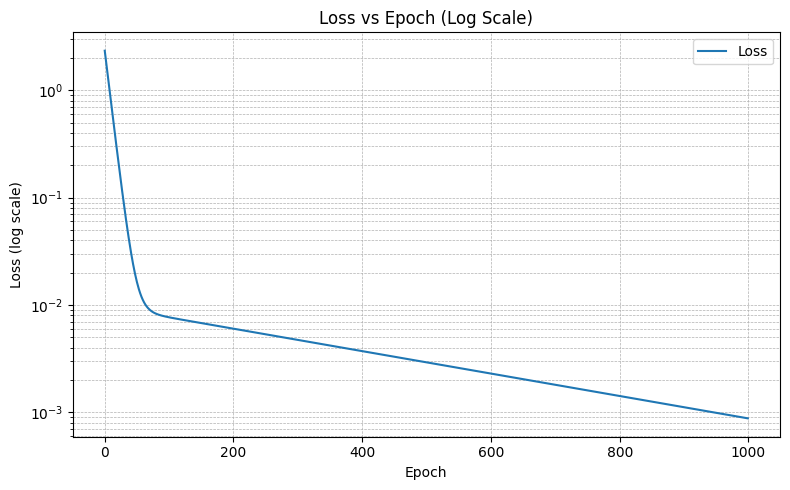

In [8]:
plot_loss_curve_log(regressor.losses)

## Improvements ##
* Add regularization
* Weight init
* check dimensions to validate 

## Add L2- regularization

In [12]:
class LinearRegressionGDreg:
    """
    Linear regression using gradient descent with L2 regularization.

    Parameters:
    - X: numpy array of shape (m, n+1), input features with bias column
    - y: numpy array of shape (m, 1), target values
    - alpha: learning rate
    - iterations: number of iterations
    - lambda_: regularization strength

    compute:
    - theta: learned coefficients (n+1, 1)
    - losses: list of loss values per iteration
    
    Return:
    - predictions: prdiction of y
    """
    def __init__(self, alpha=0.001, iterations=100,lambda_ = 0.01):
        self.theta = None
        self.alpha = alpha
        self.iterations = iterations
        self.lambda_ = lambda_
        self.losses = []
        
    def fit(self, X,y):
        m, n = X.shape
        y = y.reshape(-1, 1)
        self.theta = np.zeros((n, 1))
        # X = np.hstack([np.ones((len(X), 1)), X]) if bias tern not added
        for i in range(self.iterations):
            predictions = X @ self.theta                                      # forward pass
            error = predictions - y                                           # calulate error for gradient

            l2_penalty = (1/(2*m)) * self.lambda_* np.sum(self.theta[1:]**2)  # exclude the bias
            mse = (1/(2*m))*np.sum(error**2)                                  # compute mse loss 
            loss = mse + l2_penalty 
            self.losses.append(loss)
            gradient = (1/m) * (X.T @ error)                                  # calculate gradient of loss func , backward step
            gradient[1:] += (self.lambda_/m)* self.theta[1:]                       # exclude the bias
            self.theta -= self.alpha*gradient

    def predict(self,X):
        # X = np.hstack([np.ones((len(X), 1)), X]) if bias tern not added
        predictions = X @ self.theta
        return predictions

In [13]:
regressor = LinearRegressionGDreg(alpha = 0.01, iterations = 1000)

In [14]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
regressor.fit(X,y)

In [15]:
regressor.theta

array([[0.11698368],
       [0.94796959]])

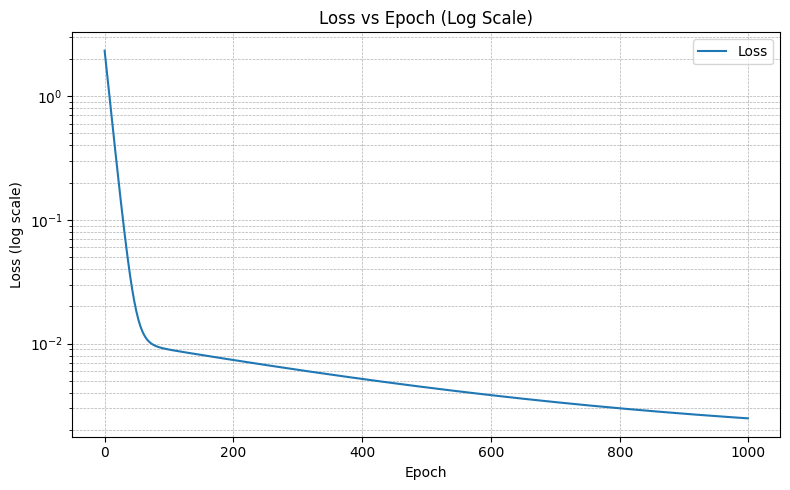

In [16]:
plot_loss_curve_log(regressor.losses)

## Add L2- regularization and init weight with normal distribution

In [17]:
class LinearRegressionGDreg:
    """
    Linear regression using gradient descent with L2 regularization.

    Parameters:
    - X: numpy array of shape (m, n+1), input features with bias column
    - y: numpy array of shape (m, 1), target values
    - alpha: learning rate
    - iterations: number of iterations
    - lambda_: regularization strength

    compute:
    - theta: learned coefficients (n+1, 1)
    - losses: list of loss values per iteration
    
    Return:
    - predictions: prediction of y
    """
    def __init__(self, alpha=0.001, iterations=100,lambda_ = 0.01):
        self.theta = None
        self.alpha = alpha
        self.iterations = iterations
        self.lambda_ = lambda_
        self.losses = []
        
    def fit(self, X,y):
        if len(X) != len(y) or len(X) ==0:
            raise ValueError('X and y must  must have the same length and cannot be empty')
        m, n = X.shape
        y = y.reshape(-1, 1)
        self.theta = np.random.randn(n, 1)
        # X = np.hstack([np.ones((len(X), 1)), X]) if bias term not added
        for i in range(self.iterations):
            predictions = X @ self.theta                                      # forward pass
            error = predictions - y                                           # calulate error for gradient

            l2_penalty = (1/(2*m)) * self.lambda_* np.sum(self.theta[1:]**2)
            mse = (1/(2*m))*np.sum(error**2)                                  # compute mse loss 
            loss = mse + l2_penalty 
            self.losses.append(loss)
            gradient = (1/m) * (X.T @ error)                                  # calculate gradient of loss func , backward step
            gradient[1:] += (self.lambda_/m)* self.theta[1:]
            self.theta -= self.alpha*gradient

    def predict(self,X):
        # X = np.hstack([np.ones((len(X), 1)), X]) if bias tern not added
        predictions = X @ self.theta
        return predictions

In [18]:
regressor = LinearRegressionGDreg(alpha = 0.01, iterations = 1000)

In [19]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
regressor.fit(X,y)

In [20]:
regressor.theta

array([[-0.04706664],
       [ 1.0200913 ]])

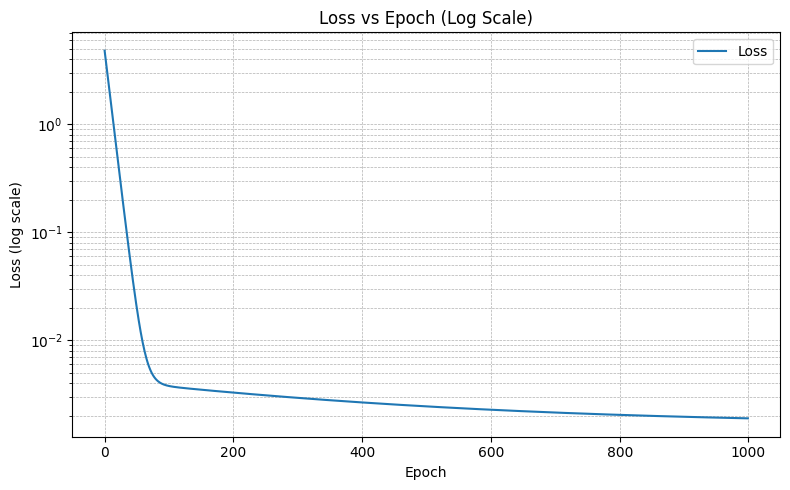

In [21]:
plot_loss_curve_log(regressor.losses)

In [22]:
np.zeros(3)

array([0., 0., 0.])

In [23]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])